### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## João Carvalho Assignment

### Scenario
Turtle Games, a game manufacturer and retailer, manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. 

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')  

# View the DataFrame.
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Determine the number of rows with missing values
reviews_na = reviews[reviews.isna().any(axis=1)]

# In the case of missing values, show the cases
if len(reviews_na)>0:
    print (reviews_na)
else:
    print ("No rows with missing values")

No rows with missing values


In [4]:
# Check some stats about our data
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [5]:
# Drop unnecessary columns.
reviews.drop(columns=['language', 'platform'])

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [6]:
# Rename the column headers.
reviews.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace = True)

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'language', 'platform', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output.
reviews.to_csv('turtle_reviews_clean.csv', index=False)  

In [136]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews_clean.csv')  

# View the DataFrame.
reviews.info()
reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   language        2000 non-null   object 
 7   platform        2000 non-null   object 
 8   product         2000 non-null   int64  
 9   review          2000 non-null   object 
 10  summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression with loyalty_points as independent variable

In [9]:
# Independent variable.
y = reviews['loyalty_points']  

### 5a) spending vs loyalty

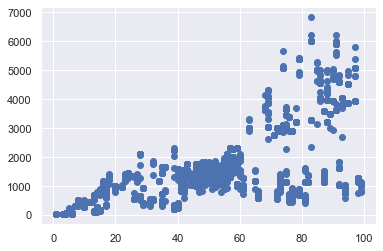

In [131]:
# Dependent variable
x_spending = reviews['spending_score'].values.reshape(-1, 1)

# Plot to explore relationship
plt.scatter(x_spending,y) 

In [11]:
# OLS model and summary.
lr_spending = sm.OLS(y, sm.add_constant(x_spending)).fit()
print(lr_spending.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        10:48:00   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.0527     45.931     -1.634      0.1

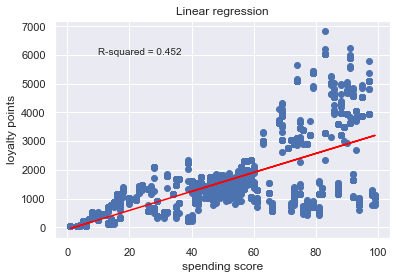

In [172]:
# Set linear regression and fit the model
lr_spending = LinearRegression()  
lr_spending.fit(x_spending, y)  

# Call the predictions for X (array).
lr_spending.predict(x_spending) 

# Plot the graph with a regression line.
y_pred_spending = lr_spending.coef_ * x_spending + lr_spending.intercept_

# Draw the scatterplot using Matplotlib. 
plt.scatter(x_spending,y) 

# Plot X and predicted y as a line. Set the line colour to red.
plt.plot(x_spending, y_pred_spending, color='red') 

plt.title("Linear regression")
plt.xlabel("spending score")
plt.ylabel("loyalty points")
plt.text(10, 6000, 'R-squared = %0.3f' % lr_spending.score(x_spending, y))
plt.show()

### 5b) renumeration vs loyalty

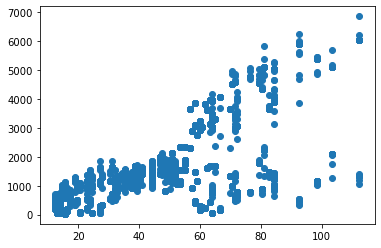

In [13]:
# Dependent variable
x_remuneration = reviews['remuneration'].values.reshape(-1, 1)

# Plot to explore relationship
plt.scatter(x_remuneration,y) 

In [14]:
# OLS model and summary.
lr_remuneration = sm.OLS(y, sm.add_constant(x_remuneration)).fit()
print(lr_remuneration.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        10:48:01   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.6865     52.171     -1.259      0.2

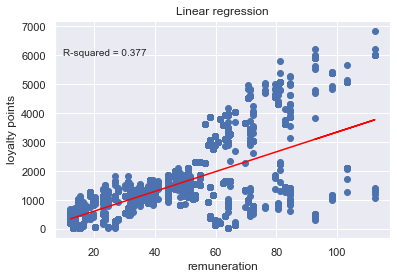

In [174]:
# Set linear regression and fit the model
lr_remuneration = LinearRegression()  
lr_remuneration.fit(x_remuneration, y)  

# Call the predictions for X (array).
lr_remuneration.predict(x_remuneration) 

# Plot the graph with a regression line.
y_pred_remuneration = lr_remuneration.coef_ * x_remuneration + lr_remuneration.intercept_

# Draw the scatterplot using Matplotlib. 
plt.scatter(x_remuneration,y) 

# Plot X and predicted y as a line. Set the line colour to red.
plt.plot(x_remuneration, y_pred_remuneration, color='red') 

plt.title("Linear regression")
plt.xlabel("remuneration")
plt.ylabel("loyalty points")
plt.text(10, 6000, 'R-squared = %0.3f' % lr_spending.score(x_remuneration, y))
plt.show()

### 5c) age vs loyalty

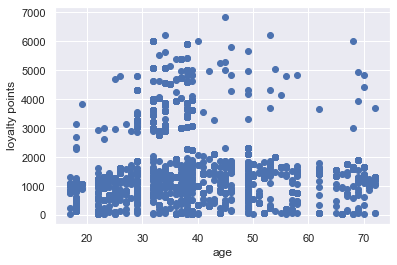

In [139]:
# Dependent variable
x_age = reviews['age'].values.reshape(-1, 1)

# Plot to explore relationship
plt.scatter(x_age,y) 
plt.xlabel("age")
plt.ylabel("loyalty points")
plt.show()

> Non-linear regression between age and loyalty points.

### 5d) Multilinear regression using loyalty_points as dependent variable

In [17]:
# Define the independent variables
X = reviews[['spending_score', 'remuneration', 'age']] 

In [18]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [19]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.8399114912748796
Intercept:  -2203.059751307902
Coefficients:


[('spending_score', 34.18319657763368),
 ('remuneration', 34.00838549260248),
 ('age', 11.06065871184337)]

#### As Age vs loyalty graphic shows non-linear pattern, estimate MLR without age to check the impact

In [20]:
# Define the independent variables
X = reviews[['spending_score', 'remuneration']] 

In [21]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [22]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_)) 

R-squared:  0.826913470198926
Intercept:  -1700.3050970144361
Coefficients:


[('spending_score', 32.89269468782099), ('remuneration', 33.979498821802814)]

> The two models, MLR with and withou age variable, have similar R-squared. In this case, it is selected the simplest and the one with the fewer variables, i.e., without age (additionally motivated by age vs loyalty shows a non-linear pattern). 

#### Train and test subsets with (MLR) multiple linear regression

In [23]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                                                            y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     3665.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:48:03   Log-Likelihood:                -12292.
No. Observations:                1600   AIC:                         2.459e+04
Df Residuals:                    1597   BIC:                         2.461e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1700.3810     40.400    -42.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Check heterocedasticy

In [24]:
model = sms.het_breuschpagan(model.resid, model.model.exog) 
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 39.230974380828165, 'LM Test p-value': 3.0276254927398743e-09, 'F-stat': 20.070832089113214, 'F-test p-value': 2.4609115607567316e-09}


> Using statsmodels to check homoscedasticity, it is observed that LM p-value is smaller than 0.05, finding evidence of **heteroscedasticity which is a problem**. In this way, repeat the process using sqrt(y) instead of y.

### 5d) Multilinear regression using sqrt(loyalty_points) as dependent variable

In [25]:
# Fit the regression model.
mlr_1 = linear_model.LinearRegression()
mlr_1.fit(X, np.sqrt(y))

LinearRegression()

In [26]:
# Print the R-squared value.
print("R-squared: ", mlr_1.score(X,np.sqrt(y)))  

# Print the intercept.
print("Intercept: ", mlr_1.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr_1.coef_)) 

R-squared:  0.888699929604955
Intercept:  -4.136673134772792
Coefficients:


[('spending_score', 0.42665943890888497),
 ('remuneration', 0.40352880258596313)]

#### Train and test subsets with (MLR) multiple linear regression

In [27]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,
                                                                            np.sqrt(y),
                                                                            test_size = 0.20,
                                                                            random_state = 5)

# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     5944.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:48:04   Log-Likelihood:                -4895.5
No. Observations:                1600   AIC:                             9797.
Df Residuals:                    1597   BIC:                             9813.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.0766      0.397    -10.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Check heterocedasticy

In [28]:
model = sms.het_breuschpagan(model.resid, model.model.exog) 
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 0.0008354871271265552, 'LM Test p-value': 0.9995823436791303, 'F-stat': 0.00041696051207825834, 'F-test p-value': 0.9995831265126627}


> In this case (y=sqrt(loyalty_points)), it is observed that LM p-value is higher than 0.05, **verifying the assumption of homocedasticy.**

#### Run a regression test

In [29]:
# Specify the model.
mlr_1 = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr_1.fit(x_train, y_train)  

# Call the predictions for X in the train set.
y_pred_mlr = mlr_1.predict(x_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr))

Prediction for train set: [31.34867659 24.03578799 45.19819032 ... 36.16304719  4.41793858
 32.20182983]


In [30]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error (Final): 4.129581641163761
Mean Square Error (Final): 26.35388705792768


### Detecting multicollinearity

In [31]:
# Add a constant.
x_temp = sm.add_constant(x_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values,i) for i in range(x_temp.values.shape[1])]  

# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0        9.45           const
1        1.00  spending_score
2        1.00    remuneration


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Multicollinearity is when there are high intercorrelations between two or more independent variables in an MLR model. 
VIF measures multicollinearity by identifying the correlation between independent variables and the strength of correlation. If the VIF value is one, then there is no correlation between an independent variable and any others. 
> In this case, VIF Factor for all independent variables is close to 1, then there is no correlation between an independent variable and any others.

## 6. Observations and insights

- Firstly, three single linear regressions were estimated to analyse how loyalty points (independent variable) could be explained by spending/remuneration/age variables. We conclude for all a poor R2, lower than 50%, which are not reliable.
- Then, a Multi Linear Regression (MLR) model is calculated to estimate loyalty points, using jointly these two independent variables: spendind and remuneration variables (an alternative of considering additionally age variable was studied but no considered has produced similar R-squared. In this case, was chosen the simplest). It is obtained an higher adjusted R2, with all variables with a p-value < 0,05 which allows us to conclude a strong model to estimate loyalty points through spending/remuneration/age variables. 
- Although, it is observed heterocedasticy which is a problem. In this way, we reestimate using sqrt(y) instead of y, concluding a new model with an higher adjusted R2 and all variables with a p-value <0,05, as well.
- Then, the variance inflation factor (VIF) was calculated to measure the multicollinearity. Don't want high multicollinearity as it causes unreliable estimates. As VIF values are closer to 1, its OK, there is no correlation between an independent variable and any others.
- Moreover, as Durbin-Watson statistic value is near to 2, it is verified that **Residuals are not dependent**.


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [32]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [33]:
# View DataFrame ('turtle_reviews_clean.csv')
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [34]:
# Drop unnecessary columns.
reviews=reviews[['gender','education','remuneration', 'spending_score']]

# View DataFrame.
reviews.head()

,gender,education,remuneration,spending_score
0,Male,graduate,12.30,39
1,Male,graduate,12.30,81
2,Female,graduate,13.12,6
3,Female,graduate,13.12,77
4,Female,graduate,13.94,40


In [35]:
# Explore the data.
reviews.dtypes

gender             object
education          object
remuneration      float64
spending_score      int64
dtype: object

In [36]:
# Descriptive statistics.
reviews.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Scatterplot remuneration vs spending_score

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

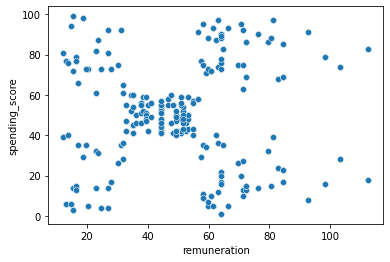

In [37]:
# Import Seaborn and Matplotlib.
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score', data=reviews)

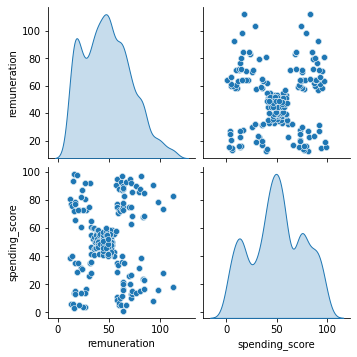

In [38]:
# Create a pairplot with Seaborn.
x = reviews[['remuneration', 'spending_score']]

sns.pairplot(reviews, vars=x, diag_kind= 'kde')

## 3. Elbow and silhoutte methods

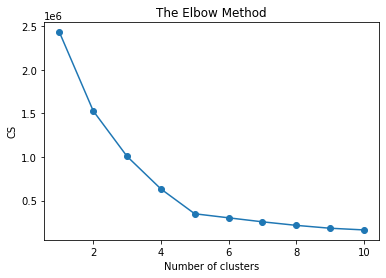

In [39]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

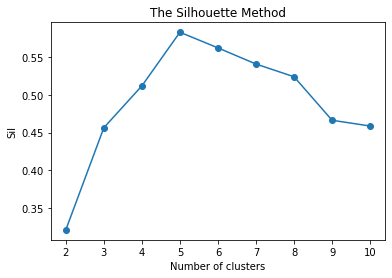

In [40]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

> Analysing the plots with Elbow and Silhouette methods, it is decided to evaluate the following options for k: 4, 5 and 6

## 4. Evaluate k-means model at different values of *k*

##### 4.1. k = 5 clusters

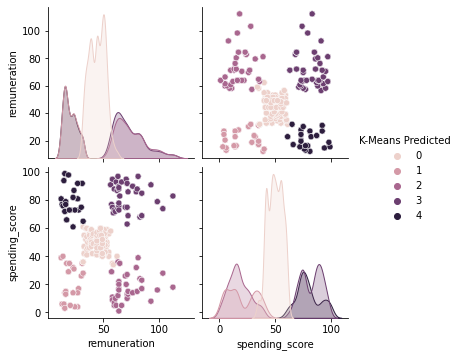

In [41]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [42]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

##### 4.2. k = 4 clusters

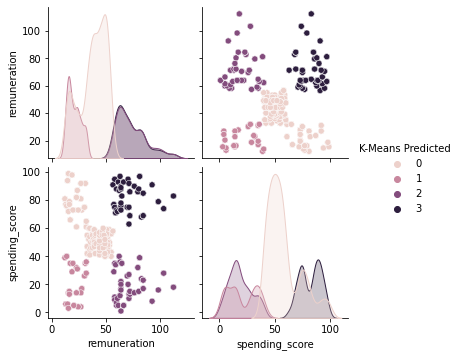

In [43]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [44]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

##### 4.3. Use 6 clusters

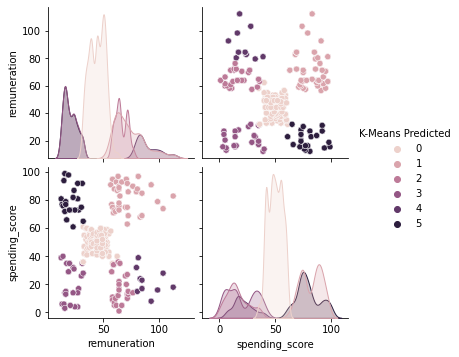

In [45]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Final model and justification

It seems that five clusters (k = 5) might give the best results, taking into account that:
- Silhoute method: 5 is the inflection point 
- Elbow method: the line chart begins straightening out around 5. This means after k=5, the reduction in error of each additional cluster is small and insignificant. 
- Analysing the plots for the different options, it seems give the most reasonable interpretation: one cluster with low values in both variables, second cluster with high values in both variables, third and fourth cluster with lower and higher values in each case, and five cluster with central plot values 

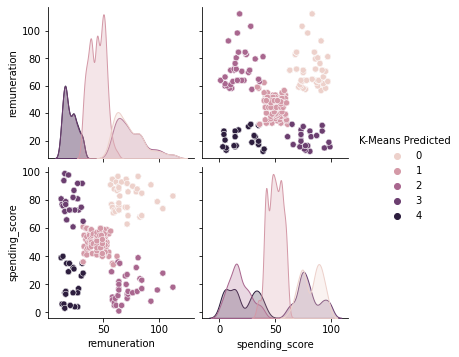

In [46]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [47]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [48]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

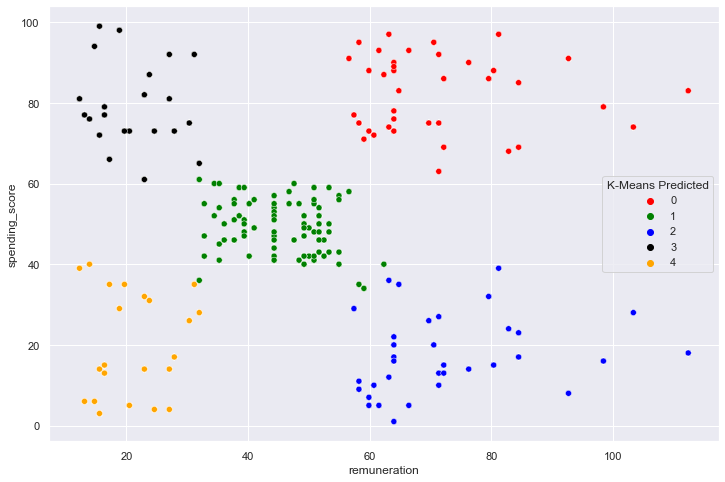

In [49]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

## 7. Discuss: Insights and observations

**5-means cluster model**, identifying patterns spending vs remuneration:
- Low-values (0 to 40) in both variables (yellow)
- High-values remuneration (approx > 60) and low-values for spending (<40)
- High-values spending (approx > 60) and low-values for remuneration (<40)
- High-values in both cases (approx > 60)
- Average values in both cases (between approx 40 and 60)

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the most common words used in online product reviews. They also want to have a list of the top positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## 1. Load and explore the data

In [50]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [51]:
# Load the data ('turtle_reviews_clean.csv')
df_reviews = pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame
df_reviews.head() 

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [52]:
# Explore dataset
df_reviews.info()
print(df_reviews.shape)
print(df_reviews.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   language        2000 non-null   object 
 7   platform        2000 non-null   object 
 8   product         2000 non-null   int64  
 9   review          2000 non-null   object 
 10  summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
(2000, 11)
Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'language', 'platform', 'product', 'review', 'summary'],
      dtype='object')


In [53]:
# View the number of products
df_reviews['product'].unique()

array([  453,   466,   254,   263,   291,   977,   979,  1012,  1031,
        1459,  1463,  1473,  1497,  1501,  1506,   123,   486,   830,
        1175,  1183,  1212,  1241,  1307,   535,   577,   618,   624,
         760,   231,  2139,  2162,  2173,  2253,  2261,  1940,  1945,
        1970,  2793,   195,   107,   811,  2814,  2829,   629,  3645,
        3657,  3667,  3678,  2079,  2114,  2130,  3865,  3878,  3885,
        3887,  3896,  3955,  3967,   405,   615,   876,  4459,   999,
         815,   326,  6215,  6233,   978,  9507,  9529,  9530,  9560,
        9595,  9596,  9597,  9612,  9635,  1577,  1581,  1592,  1618,
         249,   518,  2521,   930,   399,   504,   948,  4452,  6646,
        6678,  6694,  6715,  6720,  6721,  6770,  6815,  3427,  3436,
        3478,  3498,  3524,  3525,  3547,  3619,  3629,  6424,  3165,
        9875,   515,   283,  2285,  2286,  2296,  2324,  2326,  2371,
        2387,  2404,  5429,  5430,  5453,  5493,  5510,  5512,  8235,
        8275,  2849,

In [54]:
# Drop unnecessary columns.
df_reviews=df_reviews[['review', 'summary']]

# View DataFrame.
df_reviews.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [55]:
# Determine the number of rows with missing values
reviews_na = df_reviews[df_reviews.isna().any(axis=1)]

# In the case of missing values, show the cases
if len(reviews_na)>0:
    print (reviews_na)
else:
    print ("No rows with missing values")

No rows with missing values


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [56]:
# Review and Summary columns: Change all to lower case
df_reviews['review'] = df_reviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_reviews['summary'] = df_reviews['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# View dataframe updated
df_reviews.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [57]:
# Remove punctuation.
df_reviews['review'] = df_reviews['review'].str.replace('[^\w\s]','')
df_reviews['summary'] = df_reviews['summary'].str.replace('[^\w\s]','')

# View dataframe updated
df_reviews.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

In [58]:
# Check the number of duplicate values in summary column.
df_reviews.duplicated().sum()

39

In [59]:
# Drop duplicates in summary column.
df_reviews = df_reviews.drop_duplicates()

# View DataFrame.
df_reviews.reset_index(inplace=True)
df_reviews

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [60]:
# Create new Dataframe
df_tokens=df_reviews.drop(columns=['index'])

# View last 5 rows of DataFrame.
df_tokens.tail()

,review,summary
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,great game did not think i would like it when ...,super fun
1958,great game for all keeps the mind nimble,great game
1959,fun game,four stars
1960,this game is fun a lot like scrabble without a...,love this game


In [61]:
# Apply tokenisation to both columns.
df_tokens['tokens_review'] = df_tokens['review'].apply(word_tokenize)
df_tokens['tokens_summary'] = df_tokens['summary'].apply(word_tokenize)

# View DataFrame.
df_tokens.head()

,review,summary,tokens_review,tokens_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [62]:
# Review: Create a WordCloud
txt = " ".join(review for review in df_tokens.review)

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap = 'plasma',
                stopwords = 'none',
                min_font_size = 10).generate(txt) 

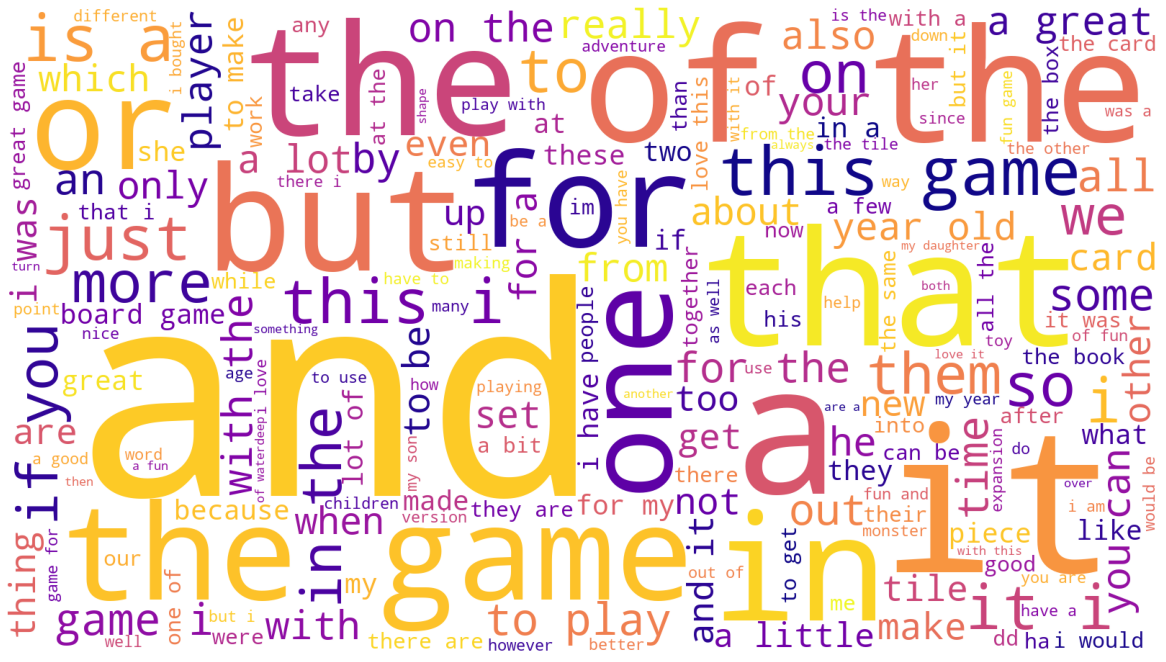

In [63]:
# Review: Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [64]:
# Summary: Create a WordCloud.
txts = " ".join(summary for summary in df_tokens.summary)

wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap = 'plasma',
                stopwords = 'none',
                min_font_size = 10).generate(txts) 

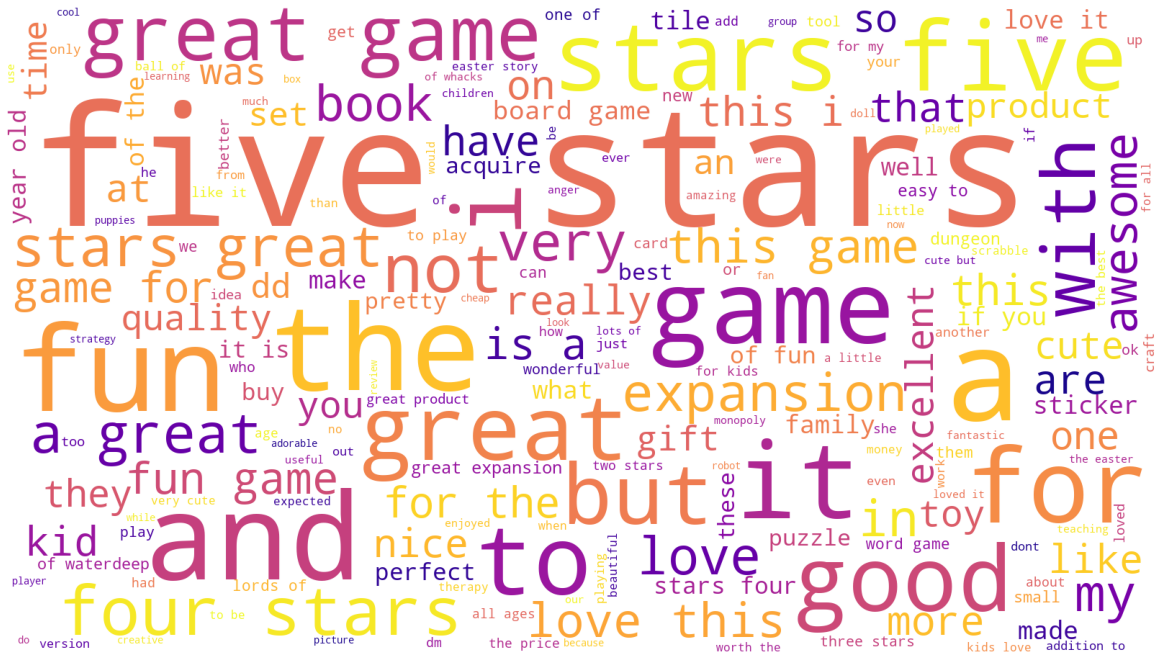

In [65]:
# Summary: Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [66]:
tokens_review = []
for i in range (df_tokens.shape[0]):
                tokens_review = tokens_review + df_tokens['tokens_review'][i]

# Determine the frequency distribution for review variable.
fdist_review = FreqDist(tokens_review)
fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [67]:
tokens_summary = []
for i in range (df_tokens.shape[0]):
                tokens_summary = tokens_summary + df_tokens['tokens_summary'][i]

# Determine the frequency distribution for summary variable.
fdist_summary = FreqDist(tokens_summary)
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [68]:
# Delete all the alpanum.
tokens_review = [word for word in tokens_review if word.isalnum()]
tokens_summary = [word for word in tokens_summary if word.isalnum()]

In [69]:
# Remove all the stopwords
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens_review = [x for x in tokens_review if x.lower() not in english_stopwords]
tokens_summary = [x for x in tokens_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_review_string = ''
tokens_summary_string = ''

for value in tokens_review:
    # Add each filtered token word to the string.
    tokens_review_string = tokens_review_string + value + ' '

    
for value in tokens_summary:
    # Add each filtered token word to the string.
    tokens_summary_string = tokens_summary_string + value + ' '

### 4c) Create wordcloud without stopwords

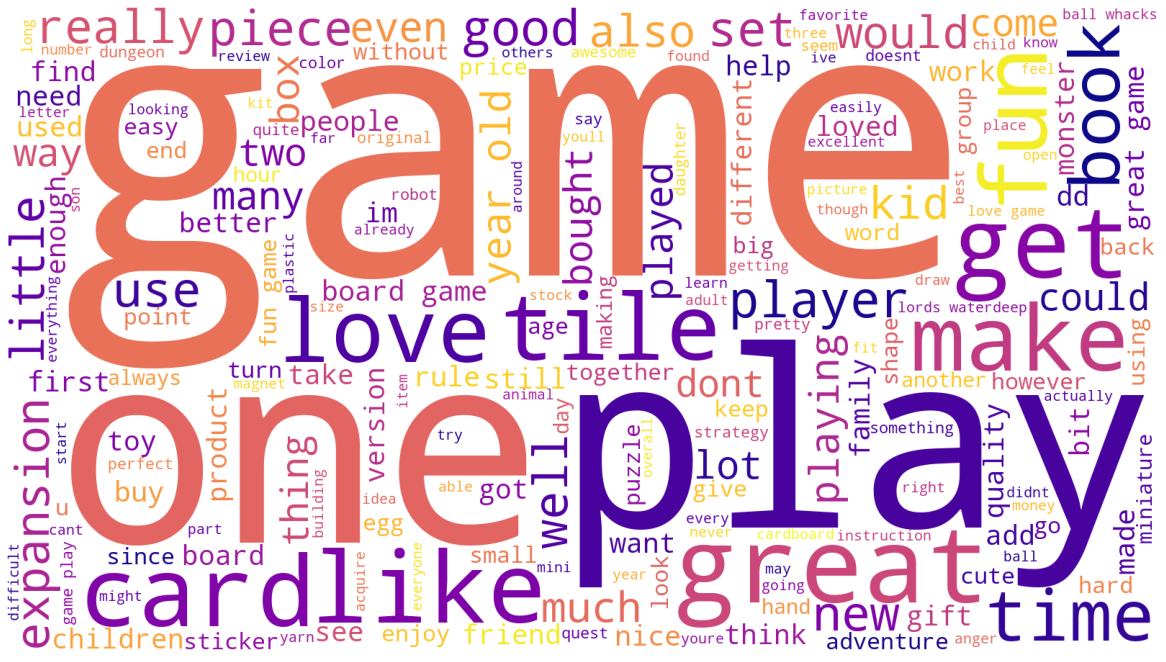

In [70]:
# Wordcloud for review variable
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                stopwords='none',
                min_font_size = 10).generate(tokens_review_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

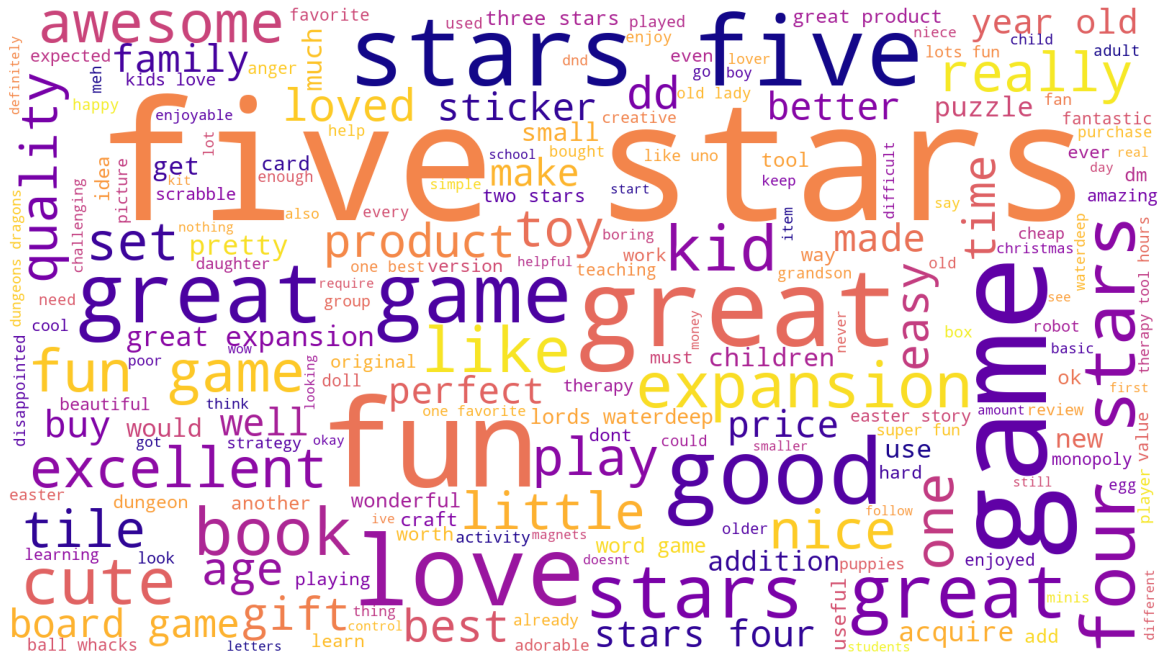

In [71]:
# Wordcloud for summary variable
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                stopwords='none',
                min_font_size = 10).generate(tokens_summary_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [72]:
# Determine the 15 most common words for review variable.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


In [73]:
# Determine the 15 most common words for summary variable.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


### Analyse frequency of individual words

In [74]:
# Determine the frequency distribution for review and summary variables (top10 most common)
fdist_review = FreqDist(tokens_review).most_common(10)
fdist_summary = FreqDist(tokens_summary).most_common(10)

## Conversion to Pandas series via Python Dictionary for plotting
df3 = pd.DataFrame.from_dict(dict(fdist_review), orient='index', columns=['review_count'])
df3.reset_index(inplace=True)
df4 = pd.DataFrame.from_dict(dict(fdist_summary), orient='index', columns=['summary_count'])
df4.reset_index(inplace=True)

In [75]:
df5=pd.merge(df3, df4, how='outer', on=['index'])
df5 = df5.sort_values(by=['review_count'], ascending=False)
df5

,index,review_count,summary_count
0,game,1671.0,319.0
1,great,580.0,295.0
2,fun,552.0,218.0
3,one,530.0,NaN
4,play,502.0,NaN
5,like,414.0,54.0
6,love,323.0,93.0
7,really,319.0,NaN
8,get,319.0,NaN
9,cards,301.0,NaN


<AxesSubplot:xlabel='count', ylabel='index'>

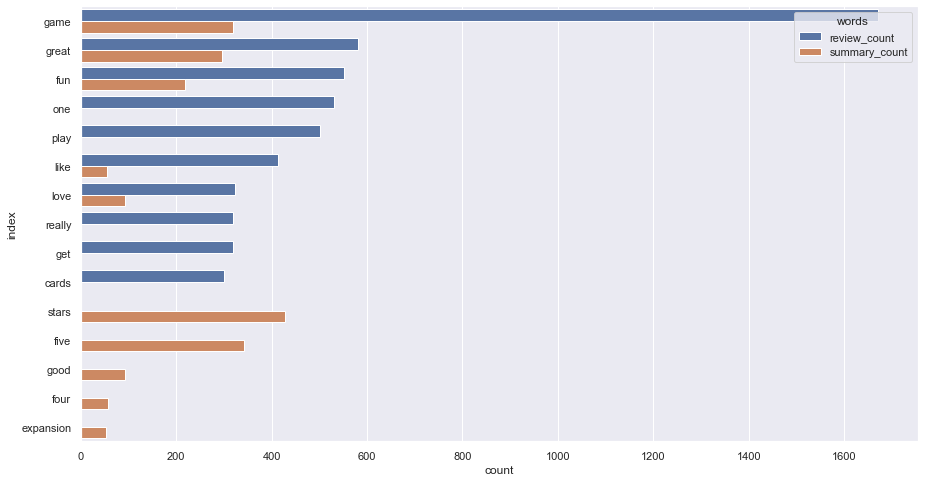

In [76]:
f, ax = plt.subplots(figsize=(15, 8))
sns.set_color_codes("pastel")
sns.barplot(data=df5.melt(id_vars='index',
                                  value_name='count', var_name='words'),
            x='count', y='index', hue='words')

#### Summary variable top10 most common words plot

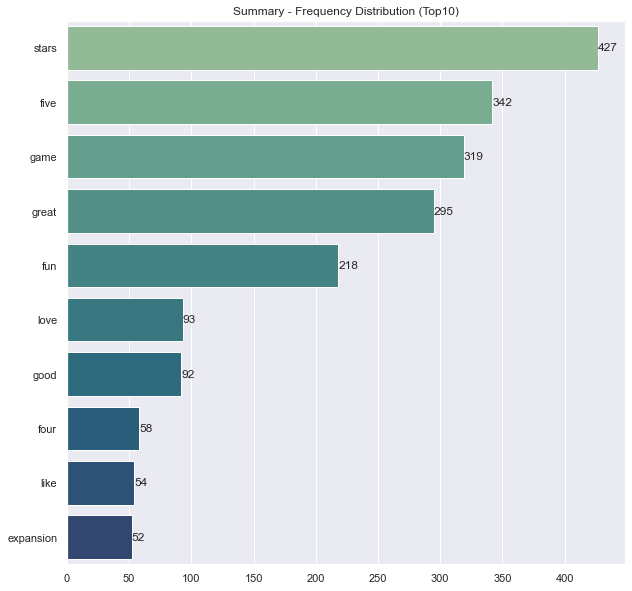

In [77]:
## Conversion to Pandas series via Python Dictionary for easier plotting
fdist_summary = pd.Series(dict(fdist_summary))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
summary_plot = sns.barplot(y=fdist_summary.index, x=fdist_summary.values, ax=ax, palette="crest")
for i in ax.containers:
    summary_plot.bar_label(i,)
plt.title('Summary - Frequency Distribution (Top10)');

#### Review variable top10 most common words plot

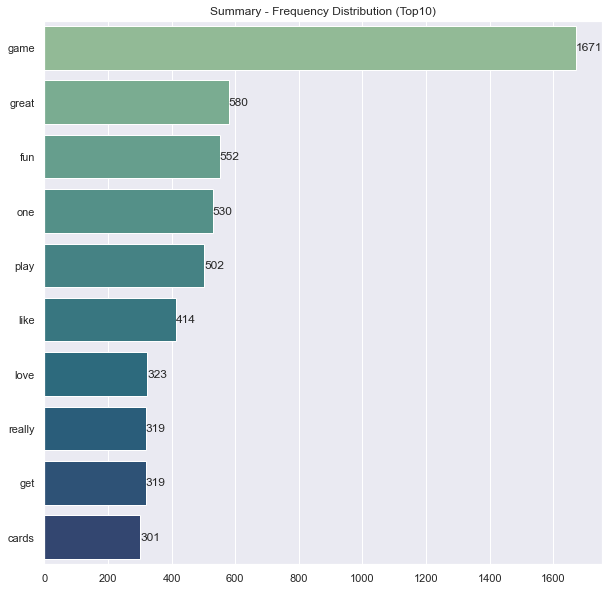

In [78]:
## Conversion to Pandas series via Python Dictionary for easier plotting
fdist_review = pd.Series(dict(fdist_review))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
review_plot = sns.barplot(y=fdist_review.index, x=fdist_review.values, ax=ax, palette="crest")
for i in ax.containers:
    review_plot.bar_label(i,)
plt.title('Summary - Frequency Distribution (Top10)');

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [79]:
# Polarity using TextBlob
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [80]:
# Determine polarity of both columns. 
df_tokens['polarity_review'] = df_tokens['review'].apply(generate_polarity)
df_tokens['polarity_summary'] = df_tokens['summary'].apply(generate_polarity)

# View output.
df_tokens.head()

,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


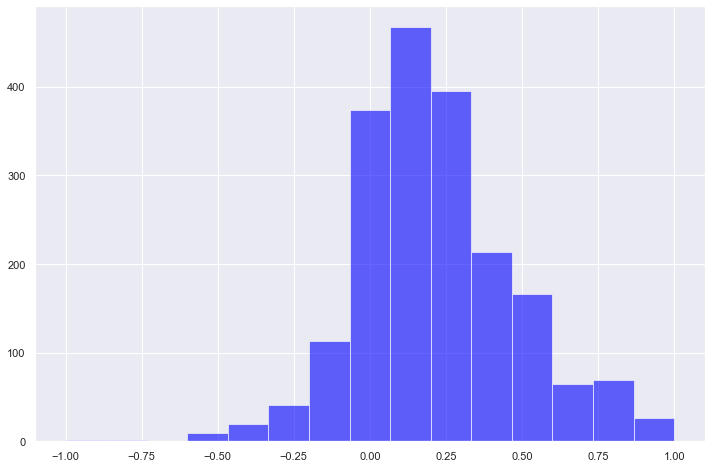

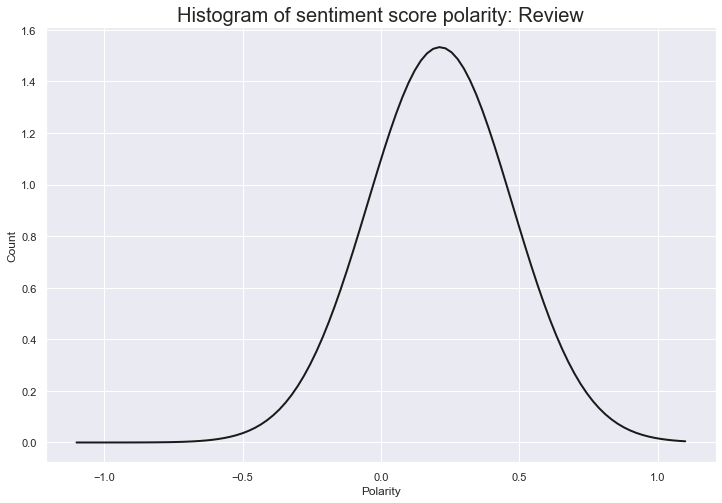

In [81]:
# Review: Create histograms plot with bins = 15.

# Histogram of polarity
num_bins = 15
plt.hist(df_tokens['polarity_review'], num_bins, facecolor='blue', alpha=0.6)

# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax, 100)
mu,std=norm.fit(df_tokens['polarity_review'])
p=norm.pdf(x,mu,std)
plt.figure(figsize=(12,8))
plt.plot(x,p,'k',linewidth=2)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity: Review', fontsize=20)

plt.show();

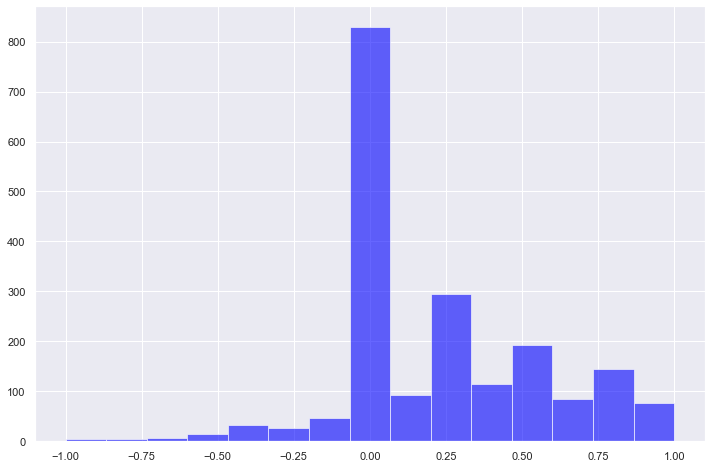

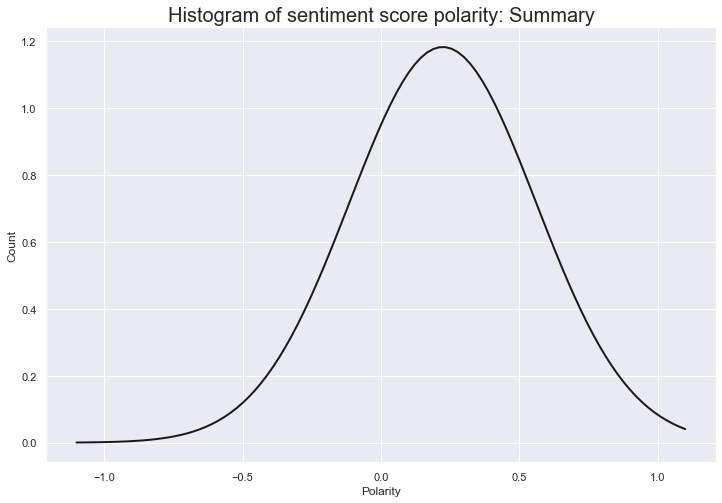

In [82]:
# Summary: Create histogram plot with bins = 15.

# Histogram of polarity
num_bins = 15
plt.hist(df_tokens['polarity_summary'], num_bins, facecolor='blue', alpha=0.6)

# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax, 100)
mu,std=norm.fit(df_tokens['polarity_summary'])
p=norm.pdf(x,mu,std)
plt.figure(figsize=(12,8))
plt.plot(x,p,'k',linewidth=2)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity: Summary', fontsize=20)

plt.show();

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [83]:
# Top 20 negative reviews.

# Create a DataFrame.
negative_sentiment = df_tokens.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review', 'polarity_review']]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,polarity_review
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
226,this was a gift for my daughter i found it difficult to use,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


In [84]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = df_tokens.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary', 'polarity_summary']]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,polarity_summary
21,the worst value ive ever seen,-1.000000
207,boring unless you are a craft person which i am,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
143,disappointed,-0.750000
623,disappointed,-0.750000
785,disappointed,-0.750000
1591,disappointed,-0.750000
361,promotes anger instead of teaching calming methods,-0.700000


In [85]:
# Top 20 positive reviews.

# Create a DataFrame.
positive_sentiment = df_tokens.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'polarity_review']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,polarity_review
7,came in perfect condition,1.000000
164,awesome book,1.000000
193,awesome gift,1.000000
489,excellent activity for teaching selfmanagement skills,1.000000
517,perfect just what i ordered,1.000000
583,wonderful product,1.000000
601,delightful product,1.000000
613,wonderful for my grandson to learn the resurrection story,1.000000
782,perfect,1.000000
923,awesome,1.000000


In [86]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment = df_tokens.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'polarity_summary']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,polarity_summary
6,best gm screen ever,1.000000
28,wonderful designs,1.000000
32,perfect,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000
133,perfect for preschooler,1.000000
139,awesome sticker activity for the price,1.000000
160,awesome book,1.000000
162,he was very happy with his gift,1.000000
186,awesome,1.000000
209,awesome and welldesigned for 9 year olds,1.000000


### Extra: NLP using Vader Lexicon (applied in summary variable)

In [87]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [117]:
df_tokens

,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.150000
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.800000
2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.000000
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.000000
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.000000
...,...,...,...,...,...,...
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w...",0.168750,0.200000
1957,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]",0.158333,0.316667
1958,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]",0.200000,0.200000
1959,fun game,four stars,"[fun, game]","[four, stars]",-0.050000,0.000000


In [121]:
# Transform column of review in array
array_summary = df_tokens['summary'].values
array_summary

array(['the fact that 50 of this space is wasted on art and not terribly informative or needed art ',
       'another worthless dungeon masters screen from galeforce9',
       'pretty but also pretty useless', ..., 'great game', 'four stars',
       'love this game'], dtype=object)

In [123]:
# Split up each review into individual words
array_summary_words = [word_tokenize(_) for _ in array_summary]

# View results.
array_summary_words

[['the',
  'fact',
  'that',
  '50',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art'],
 ['another',
  'worthless',
  'dungeon',
  'masters',
  'screen',
  'from',
  'galeforce9'],
 ['pretty', 'but', 'also', 'pretty', 'useless'],
 ['five', 'stars'],
 ['money', 'trap'],
 ['five', 'stars'],
 ['best', 'gm', 'screen', 'ever'],
 ['five', 'stars'],
 ['great', 'but', 'could', 'be', 'even', 'better'],
 ['another',
  'missed',
  'opportunity',
  'not',
  'a',
  'value',
  'add',
  'to',
  'the',
  'product',
  'line'],
 ['five', 'stars'],
 ['love', 'the', 'map'],
 ['not', 'a', 'general', 'dm', 'screen'],
 ['very', 'weak', 'game'],
 ['fell', 'completely', 'flat'],
 ['five', 'stars'],
 ['good', 'book'],
 ['buckley', 'was', 'a', 'card', 'mommer'],
 ['very', 'advanced', 'but', 'as', 'good', 'as', 'it', 'gets'],
 ['you', 'better', 'know', 'what', 'youre', 'getting', 'into'],
 ['dont', 'bother'],
 ['the', 'w

In [109]:
# Apply Vader Polarity
summary_vader =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in array_summary_words}

summary_vader

{'the fact that 50 of this space is wasted on art and not terribly informative or needed art': {'neg': 0.145,
  'neu': 0.723,
  'pos': 0.132,
  'compound': -0.0711},
 'another worthless dungeon masters screen from galeforce9': {'neg': 0.326,
  'neu': 0.674,
  'pos': 0.0,
  'compound': -0.4404},
 'pretty but also pretty useless': {'neg': 0.306,
  'neu': 0.165,
  'pos': 0.529,
  'compound': 0.4019},
 'five stars': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'money trap': {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182},
 'best gm screen ever': {'neg': 0.0,
  'neu': 0.417,
  'pos': 0.583,
  'compound': 0.6369},
 'great but could be even better': {'neg': 0.0,
  'neu': 0.385,
  'pos': 0.615,
  'compound': 0.7506},
 'another missed opportunity not a value add to the product line': {'neg': 0.302,
  'neu': 0.499,
  'pos': 0.199,
  'compound': -0.1119},
 'love the map': {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369},
 'not a general dm screen': {'neg': 0.0

#### Create DataFrame and explore the most positive and negative reviews

In [110]:
# Convert the list of dictionary results to a pandas dataframe.  
polarity_pd = pd.DataFrame(summary_vader).T

# View the DataFrame.
polarity_pd

,neg,neu,pos,compound
the fact that 50 of this space is wasted on art and not terribly informative or needed art,0.145,0.723,0.132,-0.0711
another worthless dungeon masters screen from galeforce9,0.326,0.674,0.000,-0.4404
pretty but also pretty useless,0.306,0.165,0.529,0.4019
five stars,0.000,1.000,0.000,0.0000
money trap,0.697,0.303,0.000,-0.3182
...,...,...,...,...
this is a fun card game for people who like words,0.000,0.580,0.420,0.7003
sort of a card game equivalent of scrabble and a lot easier,0.000,0.763,0.237,0.4215
great game to keep the mind active,0.000,0.424,0.576,0.7783
a great mind game,0.000,0.328,0.672,0.6249


In [111]:
# Get the top 20 highest compound reviews
polarity_pd.sort_values('compound', ascending=0).head(20)

,neg,neu,pos,compound
wow what a great set of tiles for such a great price a great starter set,0.0,0.359,0.641,0.9524
wrath of ashardalon great investment for an avid rpg fan who enjoys tabletop as well as crpgs,0.0,0.462,0.538,0.9186
great for playing great for creative workshops too,0.0,0.237,0.763,0.9169
easy to learn great fun to play,0.0,0.191,0.809,0.9136
loves stickers and she loves peppa so this was perfect,0.0,0.381,0.619,0.9074
great quality very cute and perfect for my toddler,0.0,0.346,0.654,0.9073
but the kids really like it and helps start good discussion,0.0,0.422,0.578,0.8988
great game value for the price is great also,0.0,0.361,0.639,0.8910
great game great value,0.0,0.086,0.914,0.8910
i wish all those who buy better luck fairly easy to understand and plenty of,0.0,0.465,0.535,0.8885


In [112]:
# Get the top 20 highest compound reviews
polarity_pd.sort_values('compound', ascending=1).head(20)

,neg,neu,pos,compound
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
the tardis the doctor river song amy rory fight every enemy in cards,0.357,0.643,0.000,-0.7269
no 20 sided die,0.753,0.247,0.000,-0.7269
defective poor qc,0.857,0.143,0.000,-0.7184
then you will find this board game to be dumb and boring,0.359,0.641,0.000,-0.6808
before this i hated running any rpg campaign dealing with towns because it,0.276,0.724,0.000,-0.6369
but it gets repetitive and the students start to get bored after about half a round,0.284,0.716,0.000,-0.6310
worst quality adult board game ive even seen,0.369,0.631,0.000,-0.6249
adds a needed amount of tension in a tense fantasy world,0.402,0.598,0.000,-0.5719
anger control game,0.649,0.351,0.000,-0.5719


In [113]:
# The describe function on the compound will show the distribution and moments. 
polarity_pd['compound'].describe()

count    1349.000000
mean        0.385522
std         0.347774
min        -0.905200
25%         0.000000
50%         0.510600
75%         0.624900
max         0.952400
Name: compound, dtype: float64

> Positive average

<AxesSubplot:>

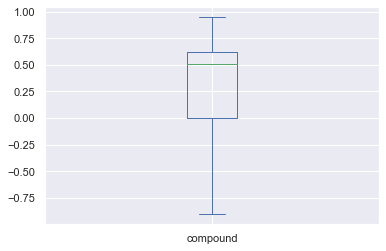

In [116]:
# Plot the outputs

%matplotlib inline
import matplotlib.pyplot as plt

# The boxplot is a nice way to see how many values sit on the edges as outliers.
_plot = polarity_pd.reset_index()['compound'].sort_values()
_plot.plot(kind='box')